<a href="https://www.kaggle.com/edwinkusi/stephen-curry-s-spectacular-2020-21-season?scriptVersionId=89460881" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
It is no secret that over the course of the last 10 years, the trends in shooting three pointers has drastically increased in volume from decades of the past. The primary beneficiary, or perhaps proprietor, of this change is no other than Stephen Curry, point guard for the Golden State Warriors. During the 2015-2016 NBA season, Stephen Curry had the most outlandish year in terms of shooting the basketball in NBA history, putting up shots at an unprecedented volume. He was rewarded by winning the Most Valuable Player award unanimously, the first and only player in NBA history to do so. 

A season as historic as this has been analyzed in several ways, being under the microscope of dozens of Data Scientists, trying to make sense of such a mind-boggling run that we had never seen before. Not only was the volume of shots that Curry was converting a rarity, but the range in which he was firing shots from were inconceivable as well. 

However, a season that has relatively flown under Curry's radar was the 2020/21 season, in which a semi-depleted Warriors team, who were missing All-Star shooting guard Klay Thompson, were carried to a playoff berth via an unconscious effort by Steph. This season, which perhaps has happened too soon to be analyzed at such proximity, may be more pivotal to Curry's career than that historic 2015/2016. Curry ended up not winning the MVP award that year, but the stats and data may say that this season is more historic than some may remember.

In [1]:
# Library Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nba-games/players.csv
/kaggle/input/nba-games/teams.csv
/kaggle/input/nba-games/ranking.csv
/kaggle/input/nba-games/games_details.csv
/kaggle/input/nba-games/games.csv


In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline

# Data Cleanup

In [3]:
players = pd.read_csv("/kaggle/input/nba-games/players.csv")
teams = pd.read_csv("/kaggle/input/nba-games/teams.csv")
games = pd.read_csv("/kaggle/input/nba-games/games.csv")
details = pd.read_csv("/kaggle/input/nba-games/games_details.csv")
ranking = pd.read_csv("/kaggle/input/nba-games/ranking.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
players.head()

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


In [5]:
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [6]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1


In [7]:
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612744,0,22021,2021-11-17,West,Golden State,14,12,2,0.857,8-1,4-1,NaN
1,1610612756,0,22021,2021-11-17,West,Phoenix,14,11,3,0.786,6-2,5-1,NaN
2,1610612742,0,22021,2021-11-17,West,Dallas,14,9,5,0.643,6-1,3-4,NaN
3,1610612743,0,22021,2021-11-17,West,Denver,14,9,5,0.643,7-1,2-4,NaN
4,1610612746,0,22021,2021-11-17,West,LA Clippers,14,9,5,0.643,7-3,2-2,NaN


In [8]:
details = details.drop_duplicates(subset=["GAME_ID", "PLAYER_NAME"])
details.head

<bound method NDFrame.head of          GAME_ID     TEAM_ID TEAM_ABBREVIATION   TEAM_CITY  PLAYER_ID  \
0       22100213  1610612764               WAS  Washington     203484   
1       22100213  1610612764               WAS  Washington    1628398   
2       22100213  1610612764               WAS  Washington    1629655   
3       22100213  1610612764               WAS  Washington     203078   
4       22100213  1610612764               WAS  Washington     203915   
...          ...         ...               ...         ...        ...   
626106  11200005  1610612743               DEN      Denver     202706   
626107  11200005  1610612743               DEN      Denver     202702   
626108  11200005  1610612743               DEN      Denver     201585   
626109  11200005  1610612743               DEN      Denver     202389   
626110  11200005  1610612743               DEN      Denver     201951   

                     PLAYER_NAME    NICKNAME START_POSITION COMMENT    MIN  \
0       Kentavi

In [9]:
steph = details[details["PLAYER_NAME"] == "Stephen Curry"]
steph.drop(["TEAM_ID", "TEAM_CITY", "PLAYER_ID", "PLAYER_NAME", "COMMENT"], axis=1, inplace=True)
steph.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,GAME_ID,TEAM_ABBREVIATION,NICKNAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
294,22100210,GSW,Stephen,G,29:14,12.0,19.0,0.632,9.0,14.0,...,0.0,7.0,7.0,5.0,2.0,1.0,2.0,4.0,37.0,16.0
708,22100194,GSW,Stephen,G,35:41,7.0,22.0,0.318,3.0,13.0,...,1.0,5.0,6.0,10.0,3.0,1.0,3.0,2.0,24.0,14.0
1273,22100183,GSW,Stephen,G,34:13,15.0,24.0,0.625,9.0,17.0,...,0.0,4.0,4.0,5.0,1.0,1.0,6.0,1.0,40.0,31.0
1684,22100169,GSW,Stephen,G,34:06,8.0,16.0,0.500,3.0,9.0,...,0.0,5.0,5.0,6.0,1.0,0.0,3.0,2.0,25.0,11.0
1944,22100152,GSW,Stephen,G,35:02,14.0,28.0,0.500,9.0,19.0,...,2.0,5.0,7.0,10.0,4.0,1.0,2.0,0.0,50.0,31.0


In [10]:
games_date = games[["GAME_DATE_EST", "GAME_ID", "SEASON"]]
games_date.head()

,GAME_DATE_EST,GAME_ID,SEASON
0,2021-11-17,22100213,2021
1,2021-11-17,22100214,2021
2,2021-11-17,22100215,2021
3,2021-11-17,22100216,2021
4,2021-11-17,22100217,2021


In [11]:
stats = steph.merge(games_date, on="GAME_ID", how="left")

In [12]:
seasonal_stats = stats.groupby("SEASON").sum()/stats.groupby("SEASON").count()

# The Underlying Year: 2020

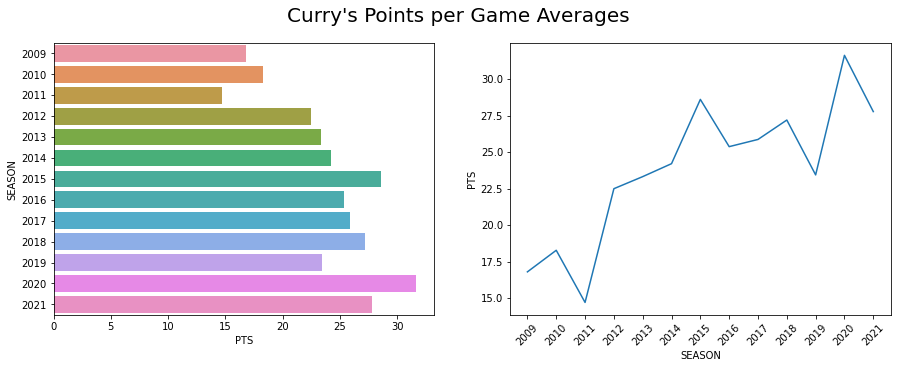

In [13]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Curry's Points per Game Averages", fontsize=20)
sns.barplot(x=seasonal_stats["PTS"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["PTS"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

Curry averaged the most points in his career in 2020. He played 63 games, averaging 32.0 points per game. In comparison to his next peak, which was that historic 2015, he outscored himself by 2 points. In both years he led the league in scoring.

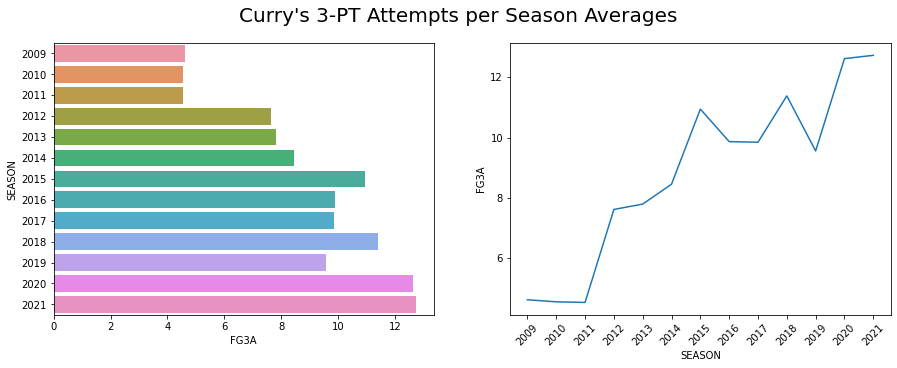

In [14]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Curry's 3-PT Attempts per Season Averages", fontsize=20)
sns.barplot(x=seasonal_stats["FG3A"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["FG3A"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

As shown above, Curry took the second most attempted threes in his career (behind the current season) in 2020, mainly due to him having to compensate for the lack of three point shooting that came from Klay Thompson's absence.

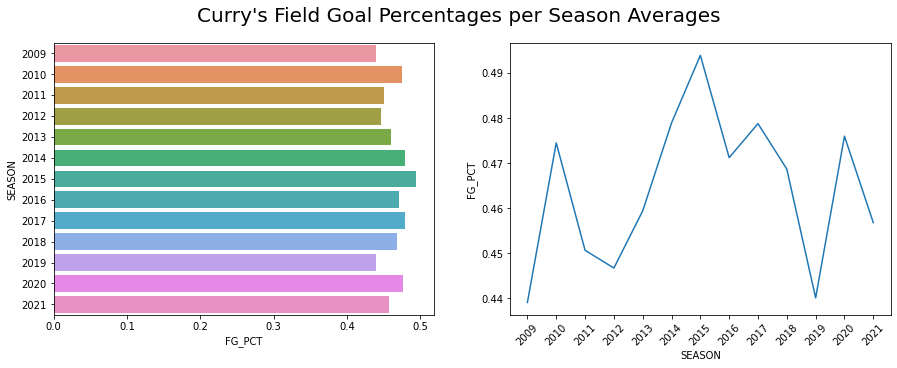

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Curry's Field Goal Percentages per Season Averages", fontsize=20)
sns.barplot(x=seasonal_stats["FG_PCT"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["FG_PCT"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

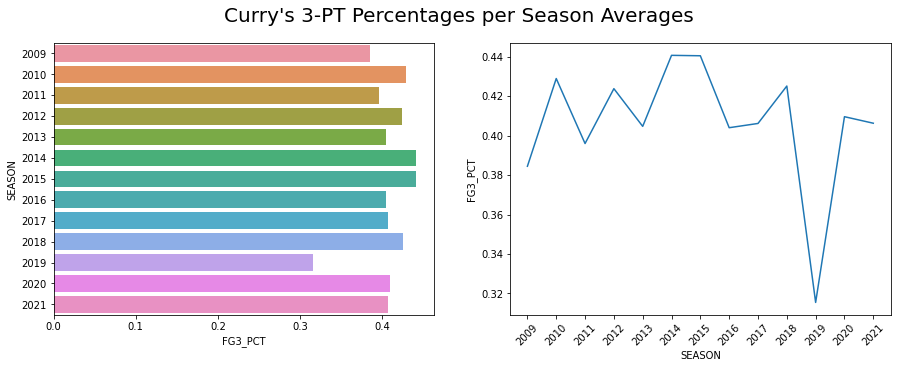

In [16]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Curry's 3-PT Percentages per Season Averages", fontsize=20)
sns.barplot(x=seasonal_stats["FG3_PCT"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["FG3_PCT"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

Even with the difference in attempts, Curry still managed to only shoot .033% worse than his best shooting percantage wise, (from the three, .018% from the field) with 1.5 more attempts (both from the field and from the three.)

# Curry vs. the Rest of the League

In [17]:
all_players = details[["PLAYER_NAME","FGM","FG_PCT", "FG3_PCT", "PTS","FG3M", "FG3A", "FTM", "FT_PCT"]]
all_players = all_players.groupby("PLAYER_NAME").sum()
all_players

,FGM,FG_PCT,FG3_PCT,PTS,FG3M,FG3A,FTM,FT_PCT
PLAYER_NAME,,,,,,,,
A.J. Guyton,0.0,0.000,0.000,4.0,0.0,2.0,4.0,1.000
A.J. Lawson,2.0,0.667,1.000,8.0,2.0,2.0,2.0,1.000
AJ Hammons,34.0,8.924,3.833,82.0,5.0,12.0,9.0,3.750
AJ Price,655.0,103.594,77.867,1832.0,267.0,805.0,255.0,96.154
Aamir Simms,1.0,1.000,0.000,4.0,0.0,0.0,2.0,1.000
...,...,...,...,...,...,...,...,...
Zion Williamson,899.0,56.398,12.500,2337.0,17.0,55.0,522.0,62.015
Zoran Dragic,11.0,1.362,0.429,28.0,3.0,15.0,3.0,2.000
Zoran Planinic,225.0,53.642,28.234,651.0,40.0,144.0,161.0,47.778


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

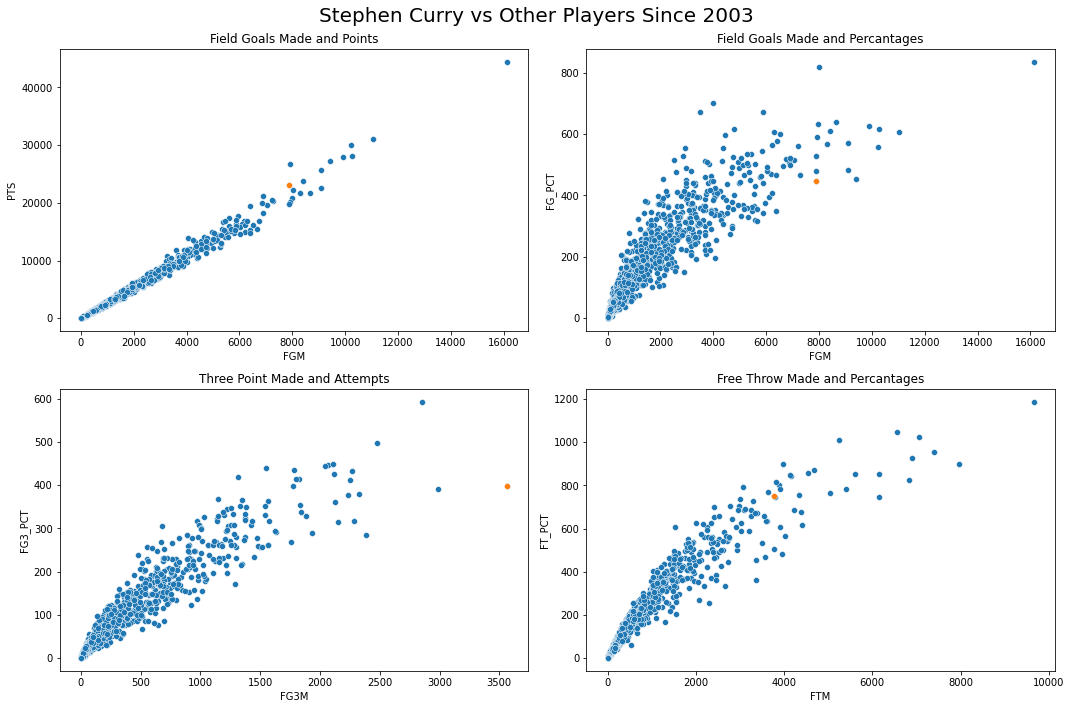

In [18]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
fig.suptitle("Stephen Curry vs Other Players Since 2003", fontsize=20)

sns.scatterplot(all_players["FGM"], all_players["PTS"], ax = axes[0][0])
sns.scatterplot(x="FGM", y="PTS", data=all_players[all_players.index == "Stephen Curry"], ax = axes[0][0])
axes[0][0].title.set_text('Field Goals Made and Points')

sns.scatterplot(all_players["FGM"], all_players["FG_PCT"], ax = axes[0][1])
sns.scatterplot(x="FGM", y="FG_PCT", data=all_players[all_players.index == "Stephen Curry"], ax = axes[0][1])
axes[0][1].title.set_text('Field Goals Made and Percantages')

sns.scatterplot(all_players["FG3M"], all_players["FG3_PCT"], ax = axes[1][0])
sns.scatterplot(x="FG3M", y="FG3_PCT", data=all_players[all_players.index == "Stephen Curry"], ax = axes[1][0])
axes[1][0].title.set_text('Three Point Made and Attempts')

sns.scatterplot(all_players["FTM"], all_players["FT_PCT"], ax = axes[1][1])
sns.scatterplot(x="FTM", y="FT_PCT", data=all_players[all_players.index == "Stephen Curry"], ax = axes[1][1])
axes[1][1].title.set_text('Free Throw Made and Percantages')

fig.tight_layout()

Despite being in the league since 2009, Curry has managed to creep into the upper echelon of all NBA players since 2003 in all major shooting statistics, and point totals.

# Conclusion
The league's bullet speedlike approach to the three becoming the best shot to take has been mostly attributed to Curry's 15/16 season. While that may be true, this is often thought to be synonymous with it being his best season. The statistics and data, however, can be used to argue against this point. Often regarded as the best shooter of all time, there is no doubt that Stephen Curry's game revolutionized the sport of basketball. Which season is better is truly up to preference, as both are historical in their own rights.